## Importing libraries - 

In [1]:
import pandas as pd
import numpy as np
import pymongo
from pymongo import MongoClient
import dask.dataframe as dd
import time

## Loading data from MongoDB in Python - 

In [2]:
cnx_string = "mongodb://127.0.0.1:27017"
client = MongoClient(cnx_string)

In [3]:
db = client['bd_project']
#select the collection within the database
test = db.winemag_data
#convert entire collection to Pandas dataframe
test = pd.DataFrame(list(test.find()))

In [4]:
test.shape

(129971, 11)

In [5]:
test.head()

,_id,,country,description,points,price,province,region_1,taster_name,variety,winery
0,6233800a96e1e2f67c153bca,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,,Sicily & Sardinia,Etna,Kerin O’Keefe,White Blend,Nicosia
1,6233800a96e1e2f67c153bcb,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,6233800a96e1e2f67c153bcc,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,6233800a96e1e2f67c153bcd,4,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
4,6233800a96e1e2f67c153bce,5,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem


## Basic data preprocessing - 

In [6]:
test.drop(['_id'], axis = 1, inplace = True)
test.head()

,,country,description,points,price,province,region_1,taster_name,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,,Sicily & Sardinia,Etna,Kerin O’Keefe,White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,4,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem


In [7]:
test.rename(columns = {test.columns[0] : "id"},inplace = True)
test.head()

,id,country,description,points,price,province,region_1,taster_name,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,,Sicily & Sardinia,Etna,Kerin O’Keefe,White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15,Douro,,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,4,US,"Much like the regular bottling from 2012, this...",87,65,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks
4,5,Spain,Blackberry and raspberry aromas show a typical...,87,15,Northern Spain,Navarra,Michael Schachner,Tempranillo-Merlot,Tandem


In [8]:
test.sort_values(by = ['id'], ascending = True, axis = 0, inplace = True)

In [9]:
test.isnull().sum()

id             0
country        0
description    0
points         0
price          0
province       0
region_1       0
taster_name    0
variety        0
winery         0
dtype: int64

In [10]:
test.loc[test['country'] == '', :]

,id,country,description,points,price,province,region_1,taster_name,variety,winery
913,913,,"Amber in color, this wine has aromas of peach ...",87,30,,,Mike DeSimone,Chinuri,Gotsa Family Wines
3131,3131,,"Soft, fruity and juicy, this is a pleasant, si...",83,,,,Roger Voss,Red Blend,Barton & Guestier
4243,4243,,"Violet-red in color, this semisweet wine has a...",88,18,,,Mike DeSimone,Ojaleshi,Kakhetia Traditional Winemaking
9509,9509,,This mouthwatering blend starts with a nose of...,92,28,,,Susan Kostrzewa,White Blend,Tsililis
9750,9750,,This orange-style wine has a cloudy yellow-gol...,89,28,,,Jeff Jenssen,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...
124176,124176,,This Swiss red blend is composed of four varie...,90,30,,,Jeff Jenssen,Red Blend,Les Frères Dutruy
129407,129407,,Dry spicy aromas of dusty plum and tomato add ...,89,22,,,Michael Schachner,Cabernet Sauvignon,El Capricho
129408,129408,,El Capricho is one of Uruguay's more consisten...,89,22,,,Michael Schachner,Tempranillo,El Capricho
129590,129590,,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",90,30,,,Mike DeSimone,Red Blend,Büyülübağ


In [11]:
test = test.reset_index(drop = True)

In [12]:
for col in test.columns[1:]:
    test[col].replace('', np.nan, inplace = True)

In [13]:
test.isnull().sum()

id                 0
country           63
description        0
points             0
price           8996
province          63
region_1       21247
taster_name    26244
variety            1
winery             0
dtype: int64

In [14]:
test.head()

,id,country,description,points,price,province,region_1,taster_name,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,Sicily & Sardinia,Etna,Kerin O’Keefe,White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Douro,NaN,Roger Voss,Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",87,65.0,Oregon,Willamette Valley,Paul Gregutt,Pinot Noir,Sweet Cheeks


In [57]:
test.variety.value_counts().sort_values(ascending = False)[:5]

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
Name: variety, dtype: int64

In [17]:
variety_names = test.variety.value_counts().sort_values(ascending = False).index
variety_counts = test.variety.value_counts().sort_values(ascending = False).values
var_df = pd.DataFrame(columns = ['var', 'var_counts'], index = range(len(variety_names)))
var_df.head()

,var,var_counts
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN


In [18]:
var_df['var'] = variety_names; var_df['var_counts'] = variety_counts
var_df.head()

,var,var_counts
0,Pinot Noir,13272
1,Chardonnay,11753
2,Cabernet Sauvignon,9472
3,Red Blend,8946
4,Bordeaux-style Red Blend,6915


## Filtering the data based on only top 30 wines - 

In [19]:
# top 30 wine varieties according to their value_counts
filtered_variety = var_df.loc[var_df['var_counts'] > 800, 'var'].tolist()

In [20]:
test_filtered = test.loc[test['variety'].isin(filtered_variety), :].copy(deep = True)

In [21]:
test_filtered.isnull().sum()

id                 0
country           40
description        0
points             0
price           6988
province          40
region_1       16305
taster_name    20174
variety            0
winery             0
dtype: int64

In [22]:
test_filtered['country'].replace(np.nan, "Unknown", inplace = True)
test_filtered['province'].replace(np.nan, "Unknown", inplace = True)
test_filtered['price'].replace(np.nan, test_filtered['price'].median(), inplace = True)

In [23]:
test_filtered.isnull().sum()

id                 0
country            0
description        0
points             0
price              0
province           0
region_1       16305
taster_name    20174
variety            0
winery             0
dtype: int64

## Content based filtering(points column) - 

In [24]:
from sklearn.neighbors import NearestNeighbors # KNN Clustering 
from scipy.sparse import csr_matrix # Compressed Sparse Row matrix

In [38]:
col = ['province','variety','points']

# Time taken for preprocessing - 
start = time.time()
wine1 = test_filtered[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

0.10411500930786133


In [26]:
# Time taken to fit the NearestNeighbors model - 
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0009968280792236328


In [27]:
np.random.seed(12345)

In [28]:
variety_list = []
for n in range(5):
    variety_list.append(np.random.choice(wine_pivot.shape[0]))
variety_list

[2, 5, 29, 1, 4]

In [29]:
wine_pivot.index[variety_list]

Index(['Cabernet Franc', 'Chardonnay', 'Zinfandel',
       'Bordeaux-style White Blend', 'Champagne Blend'],
      dtype='object', name='variety')

In [30]:
# Time taken to generate the recommendations - 
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Malbec with distance: 0.5180949932692834
2: Bordeaux-style Red Blend with distance: 0.5315296926312931
3: Cabernet Sauvignon with distance: 0.5493285215497824
4: Merlot with distance: 0.5880956549124436
5: Viognier with distance: 0.5964317842357716


Recommendation for ## Chardonnay ##:
1: Sauvignon Blanc with distance: 0.44510164437545663
2: Pinot Noir with distance: 0.47008004364727307
3: White Blend with distance: 0.5472634277556871
4: Riesling with distance: 0.5518782947073453
5: Red Blend with distance: 0.5530106012592908


Recommendation for ## Zinfandel ##:
1: Sangiovese with distance: 0.5246958274965143
2: Bordeaux-style White Blend with distance: 0.5529138424735294
3: Rhône-style Red Blend with distance: 0.5768783230219852
4: Malbec with distance: 0.6001718499575264
5: Tempranillo with distance: 0.6108758523183468


Recommendation for ## Bordeaux-style White Blend ##:
1: Zinfandel with distance: 0.5529138424735294
2: Viognier with di

## Content based filtering (points column) using Dask- 

In [31]:
import dask 
import joblib
from dask.distributed import Client# IP of the scheduler node
c = dask.distributed.Client('tcp://172.20.10.2:8786')# call the cluster c

In [32]:
c

Client Scheduler: tcp://172.20.10.2:8786 Dashboard: http://172.20.10.2:8787/status,Cluster Workers: 5 Cores: 60 Memory: 85.42 GB


In [33]:
# convert pandas dataframe into dask dataframes 
import dask.dataframe as dd
df = dd.from_pandas(test_filtered, npartitions=5)

In [34]:
df

,id,country,description,points,price,province,region_1,taster_name,variety,winery
npartitions=5,,,,,,,,,,
0,int64,object,object,int64,float64,object,object,object,object,object
26068,...,...,...,...,...,...,...,...,...,...
...,...,...,...,...,...,...,...,...,...,...
104093,...,...,...,...,...,...,...,...,...,...
129970,...,...,...,...,...,...,...,...,...,...


In [35]:
col = ['province','variety','points']

# Time taken for preprocessing - 
start = time.time()
wine1 = df[col]
wine1 = wine1.dropna()
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine1 = wine1.categorize(columns=['province'])
wine_pivot = wine1.pivot_table(index= 'variety',columns='province',values='points').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

1.2458267211914062


In [36]:
# Time taken to fit the NearestNeighbors model - 
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
with joblib.parallel_backend('dask'):
    model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.001973867416381836


In [39]:
# Time taken to generate the recommendations - 
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Chardonnay with distance: 0.7981307614083385
2: Riesling with distance: 0.82929211785956
3: Bordeaux-style Red Blend with distance: 0.836604543718854
4: Syrah with distance: 0.8497467170383037
5: Sauvignon Blanc with distance: 0.8509280458785277


Recommendation for ## Chardonnay ##:
1: Chardonnay with distance: 0.6538957408931604
2: White Blend with distance: 0.6680225146388299
3: Sauvignon Blanc with distance: 0.69165604224306
4: Pinot Noir with distance: 0.6988622673364961
5: Riesling with distance: 0.7231499198879912


Recommendation for ## Zinfandel ##:
1: Bordeaux-style Red Blend with distance: 0.8740392395963597
2: Red Blend with distance: 0.8786279153775013
3: Shiraz with distance: 0.9157202851800689
4: Sparkling Blend with distance: 0.9322932451140062
5: Syrah with distance: 0.9449761049557898


Recommendation for ## Bordeaux-style White Blend ##:
1: Grüner Veltliner with distance: 0.9053171380567206
2: Sauvignon Blanc with distance:

## Content based filtering (price column) - 

In [45]:
col = ['province','variety','price', 'points']

# Time taken for preprocessing - 
start = time.time()
wine1 = test_filtered[col]
wine1 = wine1.dropna(axis=0)
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine_pivot = wine1.pivot(index= 'variety',columns='province',values='price').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

0.10526371002197266


In [41]:
# Time taken to fit the NearestNeighbors model - 
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0009968280792236328


In [42]:
# Time taken to generate the recommendations - 
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Bordeaux-style Red Blend with distance: 0.6375735583497839
2: Sangiovese with distance: 0.6471721337331927
3: Viognier with distance: 0.6502470749829564
4: Cabernet Sauvignon with distance: 0.6525596517305995
5: Gamay with distance: 0.6839894863314537


Recommendation for ## Chardonnay ##:
1: Sauvignon Blanc with distance: 0.56514087792685
2: White Blend with distance: 0.5896801245991073
3: Pinot Noir with distance: 0.6142076454657032
4: Sparkling Blend with distance: 0.626197183525399
5: Pinot Gris with distance: 0.6321727770109917


Recommendation for ## Zinfandel ##:
1: Sangiovese with distance: 0.5064285657896965
2: Tempranillo with distance: 0.6001007379191236
3: Grüner Veltliner with distance: 0.6460215488745498
4: Rhône-style Red Blend with distance: 0.6760920687445826
5: Bordeaux-style White Blend with distance: 0.6830081430958663


Recommendation for ## Bordeaux-style White Blend ##:
1: Zinfandel with distance: 0.6830081430958663
2: 

## Content based filtering (price column) using Dask - 

In [54]:
col = ['province','variety','price', 'points']

# Time taken for preprocessing - 
start = time.time()
wine1 = df[col]
wine1 = wine1.dropna()
wine1 = wine1.drop_duplicates(['province','variety'])
wine1 = wine1[wine1['points'] > 85]

wine1 = wine1.categorize(columns=['province'])
wine_pivot = wine1.pivot_table(index= 'variety',columns='province',values='price').fillna(0)
wine_pivot_matrix = csr_matrix(wine_pivot)
print(time.time() - start)

1.611304521560669


In [55]:
# Time taken to fit the NearestNeighbors model - 
knn = NearestNeighbors(n_neighbors=10, algorithm= 'brute', metric= 'cosine')
start = time.time()
with joblib.parallel_backend('dask'):
    model_knn = knn.fit(wine_pivot_matrix)
print(time.time() - start)

0.0010004043579101562


In [46]:
# Time taken to generate the recommendations - 
start = time.time()
for n in range(5):
    query_index = variety_list[n]
    #print(n, query_index)
    distance, indice = model_knn.kneighbors(wine_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
    for i in range(0, len(distance.flatten())):
        if  i == 0:
            print('Recommendation for ## {0} ##:'.format(wine_pivot.index[query_index]))
        else:
            print('{0}: {1} with distance: {2}'.format(i,wine_pivot.index[indice.flatten()[i]],distance.flatten()[i]))
    print('\n')
print(time.time() - start)

Recommendation for ## Cabernet Franc ##:
1: Red Blend with distance: 0.8658956302447522
2: Chardonnay with distance: 0.867999986120396
3: Sauvignon Blanc with distance: 0.8702489562492846
4: Rosé with distance: 0.8866520440732445
5: Syrah with distance: 0.887753253030111


Recommendation for ## Chardonnay ##:
1: Sauvignon Blanc with distance: 0.7161394033191686
2: White Blend with distance: 0.7530384501271477
3: Chardonnay with distance: 0.7539638386648122
4: Portuguese White with distance: 0.7820564335526881
5: Pinot Noir with distance: 0.8235445966507126


Recommendation for ## Zinfandel ##:
1: Red Blend with distance: 0.9350976423397158
2: Sparkling Blend with distance: 0.941744554281679
3: Bordeaux-style Red Blend with distance: 0.955110991896964
4: Shiraz with distance: 0.9572636913648559
5: Chardonnay with distance: 0.9700180961133554


Recommendation for ## Bordeaux-style White Blend ##:
1: Red Blend with distance: 0.9221985432979799
2: White Blend with distance: 0.9572703806286

## Sentiment Analysis - 

In [47]:
test_filtered['price_log'] = np.log(test_filtered['price'])

In [48]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

SIA = SentimentIntensityAnalyzer()

# Time taken to - 
# a) generate polarity scores (through the apply method)
# b) classifying the polarity scores

start = time.time()
sentiment = test_filtered.sample(frac = 0.25).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])

sentiment['sentiment']= np.nan
sentiment.loc[sentiment.polarity_score>0,'sentiment']='POSITIVE'
sentiment.loc[sentiment.polarity_score==0,'sentiment']='NEUTRAL'
sentiment.loc[sentiment.polarity_score<0,'sentiment']='NEGATIVE'
print(time.time() - start)

13.764660835266113


In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

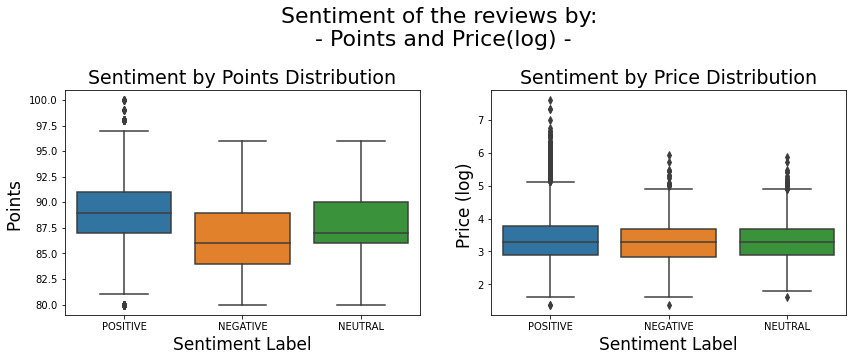

In [50]:
plt.figure(figsize=(14,5))

plt.suptitle('Sentiment of the reviews by: \n- Points and Price(log) -', size=22)

plt.subplot(121)
ax = sns.boxplot(x='sentiment', y='points', data=sentiment)
ax.set_title("Sentiment by Points Distribution", fontsize=19)
ax.set_ylabel("Points ", fontsize=17)
ax.set_xlabel("Sentiment Label", fontsize=17)

plt.subplot(122)
ax1= sns.boxplot(x='sentiment', y='price_log', data=sentiment)
ax1.set_title("Sentiment by Price Distribution", fontsize=19)
ax1.set_ylabel("Price (log) ", fontsize=17)
ax1.set_xlabel("Sentiment Label", fontsize=17)

plt.subplots_adjust(top = 0.75, wspace=.2)
plt.show()


## Sentiment Analysis using Dask - 

In [51]:
df['price_log'] = np.log(df['price'])

In [53]:
# Time taken to - 
# a) generate polarity scores (through the apply method)
# b) classifying the polarity scores

start = time.time()
sentiment = df.sample(frac = 0.25).copy()
sentiment['polarity_score']=sentiment.description.apply(lambda x:SIA.polarity_scores(x)['compound'])

sentiment['sentiment'] = np.nan
sentiment['sentiment'] = sentiment['sentiment'].mask(cond = sentiment.polarity_score>0, other = 'POSITIVE')
sentiment['sentiment'] = sentiment['sentiment'].mask(cond = sentiment.polarity_score==0, other = 'NEUTRAL')
sentiment['sentiment'] = sentiment['sentiment'].mask(cond = sentiment.polarity_score>0, other = 'NEGATIVE')

print(time.time() - start)

0.051015377044677734
